# Кодирование категориальных переменных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
scoring = {
    'Name' : ['Иван', 'Николай', 'Алексей', 'Александра', 'Евгений', 'Елена'],
    'Age' : [35, 43, 21, 34, 24, 27],
    'City' : ['Москва', 'Нижний Новгород', 'Санкт-Петербург', 'Владивосток', 'Москва', 'Екатеринбург'],
    'Experience' : [7, 13, 2, 8, 4, 12],
    'Salary' : [95, 135, 73, 100, 78, 110],
    'Credit_score' : ['Good', 'Good', 'Bad', 'Medium', 'Medium', 'Good'],
    'Outcome' : ['Вернул', 'Вернул', 'Не вернул', 'Вернул', 'Не вернул', 'Вернул']
}

df = pd.DataFrame(scoring)
df

,Name,Age,City,Experience,Salary,Credit_score,Outcome
0,Иван,35,Москва,7,95,Good,Вернул
1,Николай,43,Нижний Новгород,13,135,Good,Вернул
2,Алексей,21,Санкт-Петербург,2,73,Bad,Не вернул
3,Александра,34,Владивосток,8,100,Medium,Вернул
4,Евгений,24,Москва,4,78,Medium,Не вернул
5,Елена,27,Екатеринбург,12,110,Good,Вернул


## Еще раз про категориальные данные

### `.info()`, `.unique()`, `.value_counts()`



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          6 non-null      object
 1   Age           6 non-null      int64 
 2   City          6 non-null      object
 3   Experience    6 non-null      int64 
 4   Salary        6 non-null      int64 
 5   Credit_score  6 non-null      object
 6   Outcome       6 non-null      object
dtypes: int64(3), object(4)
memory usage: 464.0+ bytes


In [ ]:
df.dtypes

,0
Name,object
Age,int64
City,object
Experience,int64
Salary,int64
Credit_score,object
Outcome,object


In [ ]:
df.City.unique()

array(['Москва', 'Нижний Новгород', 'Санкт-Петербург', 'Владивосток',
       'Екатеринбург'], dtype=object)

In [ ]:
# метод .value_counts() сортирует категории по количеству объектов
# в убывающем порядке
df.City.value_counts()

,count
City,
Москва,2
Нижний Новгород,1
Санкт-Петербург,1
Владивосток,1
Екатеринбург,1


In [ ]:
np.unique(df.City, return_counts = True)

(array(['Владивосток', 'Екатеринбург', 'Москва', 'Нижний Новгород',
        'Санкт-Петербург'], dtype=object),
 array([1, 1, 2, 1, 1]))

In [ ]:
# посмотрим на общее количество уникальных категорий
df.City.value_counts().count()

5

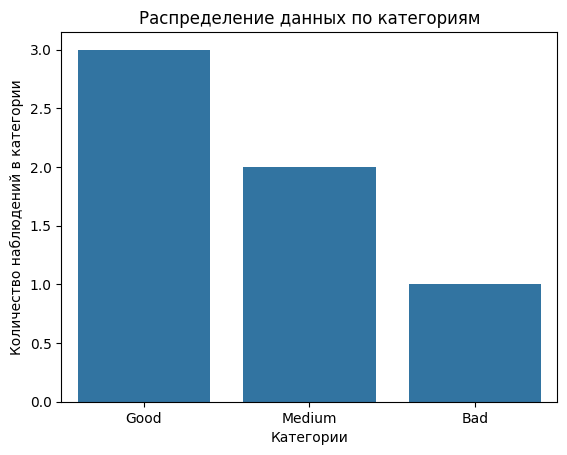

In [ ]:
score_counts = df.Credit_score.value_counts()
sns.barplot(x = score_counts.index, y = score_counts.values)
plt.title('Распределение данных по категориям')
plt.ylabel('Количество наблюдений в категории')
plt.xlabel('Категории');

### Тип данных 'category'

In [ ]:
df = df.astype({'City' : 'category', 'Outcome' : 'category'})

In [ ]:
df.Credit_score = pd.Categorical(df.Credit_score,
                                 categories = ['Bad', 'Medium', 'Good'],
                                 ordered = True)

In [ ]:
df.Credit_score.cat.categories

Index(['Bad', 'Medium', 'Good'], dtype='object')

In [ ]:
df.Credit_score.dtype

CategoricalDtype(categories=['Bad', 'Medium', 'Good'], ordered=True, categories_dtype=object)

In [ ]:
df.Credit_score.cat.codes

,0
0,2
1,2
2,0
3,1
4,1
5,2


In [ ]:
df.Outcome = df.Outcome.cat.rename_categories(new_categories =
                                              {'Вернул': 'Yes', 'Не вернул': 'No'})

df

,Name,Age,City,Experience,Salary,Credit_score,Outcome
0,Иван,35,Москва,7,95,Good,Yes
1,Николай,43,Нижний Новгород,13,135,Good,Yes
2,Алексей,21,Санкт-Петербург,2,73,Bad,No
3,Александра,34,Владивосток,8,100,Medium,Yes
4,Евгений,24,Москва,4,78,Medium,No
5,Елена,27,Екатеринбург,12,110,Good,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          6 non-null      object  
 1   Age           6 non-null      int64   
 2   City          6 non-null      category
 3   Experience    6 non-null      int64   
 4   Salary        6 non-null      int64   
 5   Credit_score  6 non-null      category
 6   Outcome       6 non-null      category
dtypes: category(3), int64(3), object(1)
memory usage: 806.0+ bytes


### Кардинальность данных

In [ ]:
region = np.where(((df.City == 'Екатеринбург') | (df.City == 'Владивосток')), 0, 1)
df.insert(loc = 3, column= 'Region', value = region)

df

,Name,Age,City,Region,Experience,Salary,Credit_score,Outcome
0,Иван,35,Москва,1,7,95,Good,Yes
1,Николай,43,Нижний Новгород,1,13,135,Good,Yes
2,Алексей,21,Санкт-Петербург,1,2,73,Bad,No
3,Александра,34,Владивосток,0,8,100,Medium,Yes
4,Евгений,24,Москва,1,4,78,Medium,No
5,Елена,27,Екатеринбург,0,12,110,Good,Yes


## Базовые методы кодирования

### Кодирование через `cat.codes`

In [ ]:
df_cat = df.copy()
df_cat.Credit_score.cat.codes

,0
0,2
1,2
2,0
3,1
4,1
5,2


In [ ]:
df_cat.Credit_score = df_cat.Credit_score.astype('category').cat.codes
df_cat

,Name,Age,City,Region,Experience,Salary,Credit_score,Outcome
0,Иван,35,Москва,1,7,95,2,Yes
1,Николай,43,Нижний Новгород,1,13,135,2,Yes
2,Алексей,21,Санкт-Петербург,1,2,73,0,No
3,Александра,34,Владивосток,0,8,100,1,Yes
4,Евгений,24,Москва,1,4,78,1,No
5,Елена,27,Екатеринбург,0,12,110,2,Yes


### Mapping

In [ ]:
df_map = df.copy()

# ключами будут старые значения признака
# значениями словаря - новые значения признака
map_dict = {'Bad' : 0,
            'Medium' : 1,
            'Good': 2}

df_map['Credit_score'] = df_map['Credit_score'].map(map_dict)
df_map

,Name,Age,City,Region,Experience,Salary,Credit_score,Outcome
0,Иван,35,Москва,1,7,95,2,Yes
1,Николай,43,Нижний Новгород,1,13,135,2,Yes
2,Алексей,21,Санкт-Петербург,1,2,73,0,No
3,Александра,34,Владивосток,0,8,100,1,Yes
4,Евгений,24,Москва,1,4,78,1,No
5,Елена,27,Екатеринбург,0,12,110,2,Yes


In [ ]:
# сделаем еще одну копию датафрейма
df_map = df.copy()

df_map.Credit_score = df_map.Credit_score.map(dict(Bad = 0, Medium = 1, Good = 2))
df_map

,Name,Age,City,Region,Experience,Salary,Credit_score,Outcome
0,Иван,35,Москва,1,7,95,2,Yes
1,Николай,43,Нижний Новгород,1,13,135,2,Yes
2,Алексей,21,Санкт-Петербург,1,2,73,0,No
3,Александра,34,Владивосток,0,8,100,1,Yes
4,Евгений,24,Москва,1,4,78,1,No
5,Елена,27,Екатеринбург,0,12,110,2,Yes


### Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df_le = df.copy()

# на вход принимает только одномерные массивы
df_le.loc[:, 'Outcome'] = labelencoder.fit_transform(df_le.loc[:, 'Outcome'])
df_le

,Name,Age,City,Region,Experience,Salary,Credit_score,Outcome
0,Иван,35,Москва,1,7,95,Good,1
1,Николай,43,Нижний Новгород,1,13,135,Good,1
2,Алексей,21,Санкт-Петербург,1,2,73,Bad,0
3,Александра,34,Владивосток,0,8,100,Medium,1
4,Евгений,24,Москва,1,4,78,Medium,0
5,Елена,27,Екатеринбург,0,12,110,Good,1


In [ ]:
# применим LabelEncoder к номинальной переменной City
df_le.loc[:, 'City'] = labelencoder.fit_transform(df_le.loc[:, 'City'])
df_le

,Name,Age,City,Region,Experience,Salary,Credit_score,Outcome
0,Иван,35,2,1,7,95,Good,1
1,Николай,43,3,1,13,135,Good,1
2,Алексей,21,4,1,2,73,Bad,0
3,Александра,34,0,0,8,100,Medium,1
4,Евгений,24,2,1,4,78,Medium,0
5,Елена,27,1,0,12,110,Good,1


In [ ]:
# применим LabelEncoder к номинальной переменной Credit_score
df_le.loc[:, 'Credit_score'] = labelencoder.fit_transform(df_le.loc[:, 'Credit_score'])
df_le

,Name,Age,City,Region,Experience,Salary,Credit_score,Outcome
0,Иван,35,2,1,7,95,1,1
1,Николай,43,3,1,13,135,1,1
2,Алексей,21,4,1,2,73,0,0
3,Александра,34,0,0,8,100,2,1
4,Евгений,24,2,1,4,78,2,0
5,Елена,27,1,0,12,110,1,1


In [ ]:
# порядок нарушен
labelencoder.classes_

array(['Bad', 'Good', 'Medium'], dtype=object)

### Ordinal Encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinalencoder = OrdinalEncoder(categories = [['Bad', 'Medium', 'Good']])

df_oe = df.copy()

# используем метод .to_frame() для преобразования Series в датафрейм
df_oe.loc[:, 'Credit_score'] = ordinalencoder.fit_transform(df_oe.loc[:, 'Credit_score'].to_frame())
df_oe

,Name,Age,City,Region,Experience,Salary,Credit_score,Outcome
0,Иван,35,Москва,1,7,95,2.0,Yes
1,Николай,43,Нижний Новгород,1,13,135,2.0,Yes
2,Алексей,21,Санкт-Петербург,1,2,73,0.0,No
3,Александра,34,Владивосток,0,8,100,1.0,Yes
4,Евгений,24,Москва,1,4,78,1.0,No
5,Елена,27,Екатеринбург,0,12,110,2.0,Yes


In [ ]:
ordinalencoder.categories_

[array(['Bad', 'Medium', 'Good'], dtype=object)]

### One Hot Encoding

#### класс OneHotEncoder

In [ ]:
df_onehot = df.copy()

from sklearn.preprocessing import OneHotEncoder

# создадим объект класса OneHotEncoder
# параметр sparse = True выдал бы результат в сжатом формате
onehotencoder = OneHotEncoder(sparse_output = False)

encoded_df = pd.DataFrame(onehotencoder.fit_transform(df_onehot[['City']]))
encoded_df

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0


In [ ]:
onehotencoder.get_feature_names_out()

array(['City_Владивосток', 'City_Екатеринбург', 'City_Москва',
       'City_Нижний Новгород', 'City_Санкт-Петербург'], dtype=object)

In [ ]:
encoded_df.columns = onehotencoder.get_feature_names_out()
encoded_df

,City_Владивосток,City_Екатеринбург,City_Москва,City_Нижний Новгород,City_Санкт-Петербург
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_onehot = df_onehot.join(encoded_df)
df_onehot.drop('City', axis = 1, inplace = True)

In [ ]:
df_onehot = df.copy()

# чтобы удалить первый признак, используем параметр drop = 'first'
onehot_first = OneHotEncoder(drop = 'first', sparse = False)

encoded_df = pd.DataFrame(onehot_first.fit_transform(df_onehot[['City']]))
encoded_df.columns = onehot_first.get_feature_names_out()

df_onehot = df_onehot.join(encoded_df)
df_onehot.drop('Outcome', axis = 1, inplace = True)
df_onehot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Name,Age,City,Region,Experience,Salary,Credit_score,City_Екатеринбург,City_Москва,City_Нижний Новгород,City_Санкт-Петербург
0,Иван,35,Москва,1,7,95,Good,0.0,1.0,0.0,0.0
1,Николай,43,Нижний Новгород,1,13,135,Good,0.0,0.0,1.0,0.0
2,Алексей,21,Санкт-Петербург,1,2,73,Bad,0.0,0.0,0.0,1.0
3,Александра,34,Владивосток,0,8,100,Medium,0.0,0.0,0.0,0.0
4,Евгений,24,Москва,1,4,78,Medium,0.0,1.0,0.0,0.0
5,Елена,27,Екатеринбург,0,12,110,Good,1.0,0.0,0.0,0.0


#### `pd.get_dummies()`

In [ ]:
df_dum = df.copy()
pd.get_dummies(df_dum, columns = ['City'])

,Name,Age,Region,Experience,Salary,Credit_score,Outcome,City_Владивосток,City_Екатеринбург,City_Москва,City_Нижний Новгород,City_Санкт-Петербург
0,Иван,35,1,7,95,Good,Yes,False,False,True,False,False
1,Николай,43,1,13,135,Good,Yes,False,False,False,True,False
2,Алексей,21,1,2,73,Bad,No,False,False,False,False,True
3,Александра,34,0,8,100,Medium,Yes,True,False,False,False,False
4,Евгений,24,1,4,78,Medium,No,False,False,True,False,False
5,Елена,27,0,12,110,Good,Yes,False,True,False,False,False


In [ ]:
pd.get_dummies(df_dum, columns = ['City'], prefix = '', prefix_sep = '')

,Name,Age,Region,Experience,Salary,Credit_score,Outcome,Владивосток,Екатеринбург,Москва,Нижний Новгород,Санкт-Петербург
0,Иван,35,1,7,95,Good,Yes,False,False,True,False,False
1,Николай,43,1,13,135,Good,Yes,False,False,False,True,False
2,Алексей,21,1,2,73,Bad,No,False,False,False,False,True
3,Александра,34,0,8,100,Medium,Yes,True,False,False,False,False
4,Евгений,24,1,4,78,Medium,No,False,False,True,False,False
5,Елена,27,0,12,110,Good,Yes,False,True,False,False,False


In [ ]:
pd.get_dummies(df_dum, columns = ['City'],
               prefix = '',
               prefix_sep = '',
               drop_first = True)

,Name,Age,Region,Experience,Salary,Credit_score,Outcome,Екатеринбург,Москва,Нижний Новгород,Санкт-Петербург
0,Иван,35,1,7,95,Good,Yes,False,True,False,False
1,Николай,43,1,13,135,Good,Yes,False,False,True,False
2,Алексей,21,1,2,73,Bad,No,False,False,False,True
3,Александра,34,0,8,100,Medium,Yes,False,False,False,False
4,Евгений,24,1,4,78,Medium,No,False,True,False,False
5,Елена,27,0,12,110,Good,Yes,True,False,False,False


#### Библиотека category_encoders

In [ ]:
# установим библиотеку
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.7 MB/s eta 0:00:00


In [ ]:
df_catenc = df.copy()

import category_encoders as ce

# в параметр cols передадим столбцы, которые нужно преобразовать
ohe_encoder = ce.OneHotEncoder(cols = ['City'])
# в метод .fit_transform() мы передадим весь датафрейм целиком
df_catenc = ohe_encoder.fit_transform(df_catenc)
df_catenc

,Name,Age,City_1,City_2,City_3,City_4,City_5,Region,Experience,Salary,Credit_score,Outcome
0,Иван,35,1,0,0,0,0,1,7,95,Good,Yes
1,Николай,43,0,1,0,0,0,1,13,135,Good,Yes
2,Алексей,21,0,0,1,0,0,1,2,73,Bad,No
3,Александра,34,0,0,0,1,0,0,8,100,Medium,Yes
4,Евгений,24,1,0,0,0,0,1,4,78,Medium,No
5,Елена,27,0,0,0,0,1,0,12,110,Good,Yes


#### Сравнение инструментов

In [ ]:
train = pd.DataFrame({'recom' : ['yes', 'no', 'maybe']})
train

,recom
0,yes
1,no
2,maybe


In [ ]:
test = pd.DataFrame({'recom' : ['yes', 'no', 'yes']})
test

,recom
0,yes
1,no
2,yes


##### `pd.get_dummies()`

In [ ]:
pd.get_dummies(train)

,recom_maybe,recom_no,recom_yes
0,False,False,True
1,False,True,False
2,True,False,False


In [ ]:
pd.get_dummies(test)

,recom_no,recom_yes
0,False,True
1,True,False
2,False,True


##### OHE sklearn

In [ ]:
ohe = OneHotEncoder()
ohe_model = ohe.fit(train)
ohe_model.categories_

[array(['maybe', 'no', 'yes'], dtype=object)]

In [ ]:
train_arr = ohe_model.transform(train).toarray()
pd.DataFrame(train_arr, columns = ['maybe', 'no', 'yes'])

,maybe,no,yes
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0


In [ ]:
test_arr = ohe_model.transform(test).toarray()
pd.DataFrame(test_arr, columns = ['maybe', 'no', 'yes'])

,maybe,no,yes
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [ ]:
ohe = OneHotEncoder()
ohe_model = ohe.fit(test)
ohe_model.categories_

[array(['no', 'yes'], dtype=object)]

##### OHE category_encoders

In [ ]:
ohe_encoder = ce.OneHotEncoder()
ohe_encoder.fit(train)

OneHotEncoder(cols=['recom'])

In [ ]:
# категория maybe стоит на последнем месте
ohe_encoder.transform(test)

,recom_1,recom_2,recom_3
0,1,0,0
1,0,1,0
2,1,0,0


In [ ]:
# убедимся в этом, добавив названия столбцов
test_df = ohe_encoder.transform(test)
test_df.columns = ohe_encoder.category_mapping[0]['mapping'].index[:3]
test_df

,1,2,3
0,1,0,0
1,0,1,0
2,1,0,0


## Binning/bucketing

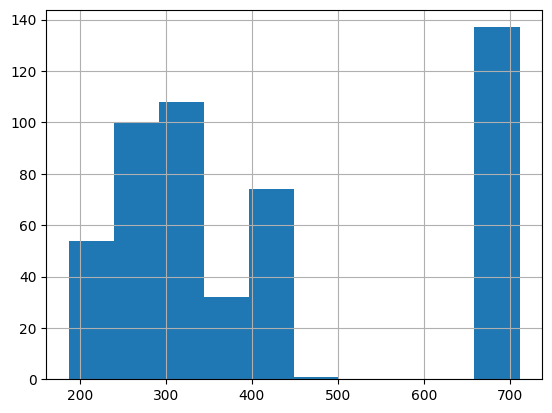

In [ ]:
boston = pd.read_csv('/content/boston.csv')
boston.TAX.hist();

### На равные интервалы

In [ ]:
min_value = boston.TAX.min()
max_value = boston.TAX.max()

bins = np.linspace(min_value, max_value, 4)
bins

array([187.        , 361.66666667, 536.33333333, 711.        ])

In [ ]:
labels = ['low', 'medium', 'high']

In [ ]:
boston['TAX_binned'] = pd.cut(boston.TAX,
                              bins = bins,
                              labels = labels,
                              # уточним, что первый интервал должен включать
                              # нижнуюю границу (значение 187)
                              include_lowest = True)

In [ ]:
boston[['TAX', 'TAX_binned']].sample(5, random_state = 42)

,TAX,TAX_binned
173,296.0,low
274,254.0,low
491,711.0,high
72,305.0,low
452,666.0,high


In [ ]:
boston.TAX.value_counts(bins = 3, sort = False)

,count
"(186.475, 361.667]",273
"(361.667, 536.333]",96
"(536.333, 711.0]",137


### По квантилям

In [ ]:
# для наглядности вначале найдем интересующие нас квантили
np.quantile(boston.TAX, q = [1/3, 2/3])

array([300., 403.])

In [ ]:
boston['TAX_qbinned'], boundaries = pd.qcut(boston.TAX,
                                            q = 3,
                                            # precision определяет округление
                                            precision = 1,
                                            labels = labels,
                                            retbins = True)

boundaries

array([187., 300., 403., 711.])

In [ ]:
boston[['TAX', 'TAX_qbinned']].sample(5, random_state = 42)

,TAX,TAX_qbinned
173,296.0,low
274,254.0,low
491,711.0,high
72,305.0,medium
452,666.0,high


In [ ]:
boston.TAX_qbinned.value_counts()

,count
TAX_qbinned,
low,172
high,168
medium,166


### KBinsDiscretizer

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

#### strategy = 'uniform'



In [ ]:
est = KBinsDiscretizer(n_bins = 3, encode = 'ordinal',
                       strategy = 'uniform', subsample = None)

est.fit(boston[['TAX']])
est.bin_edges_

array([array([187.        , 361.66666667, 536.33333333, 711.        ])],
      dtype=object)

In [ ]:
np.unique(est.transform(boston[['TAX']]), return_counts = True)

(array([0., 1., 2.]), array([273,  96, 137]))

#### strategy = 'quantile'

In [ ]:
est = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'quantile')
est.fit(boston[['TAX']])
est.bin_edges_

array([array([187., 300., 403., 711.])], dtype=object)

In [ ]:
np.unique(est.transform(boston[['TAX']]), return_counts = True)

(array([0., 1., 2.]), array([165, 143, 198]))

#### strategy = 'kmeans'

In [ ]:
est = KBinsDiscretizer(n_bins = 3, encode = 'ordinal',
                       strategy = 'kmeans', subsample = None)

est.fit(boston[['TAX']])
est.bin_edges_

array([array([187.        , 338.7198937 , 535.07350433, 711.        ])],
      dtype=object)

In [ ]:
np.unique(est.transform(boston[['TAX']]), return_counts = True)

(array([0., 1., 2.]), array([262, 107, 137]))

### С помощью статистических показателей

In [ ]:
from scipy.stats import binned_statistic

medians, bin_edges, _ = binned_statistic(boston.TAX,
                                         np.arange(0, len(boston)),
                                         statistic = 'median',
                                         bins = 3)

medians, bin_edges

(array([216. , 147.5, 424. ]),
 array([187.        , 361.66666667, 536.33333333, 711.        ]))

In [ ]:
boston['TAX_binned_median'] = pd.cut(boston.TAX,
                              bins = bin_edges,
                              labels = medians,
                              include_lowest = True)

boston['TAX_binned_median'].value_counts()

,count
TAX_binned_median,
216.0,273
424.0,137
147.5,96


### Алгоритм Дженкса

In [ ]:
!pip install jenkspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.3/611.3 kB 10.7 MB/s eta 0:00:00


In [ ]:
import jenkspy

breaks = jenkspy.jenks_breaks(boston.TAX, n_classes = 3)
breaks

[187.0, 337.0, 469.0, 711.0]

In [ ]:
boston['TAX_binned_jenks'] = pd.cut(boston.TAX,
                              bins = breaks,
                              labels = labels,
                              include_lowest = True)

boston['TAX_binned_jenks'].value_counts()

,count
TAX_binned_jenks,
low,262
high,137
medium,107
